In [1]:
import netgen.gui
from ngsolve import *
import numpy as np
from ngsolve.la import EigenValues_Preconditioner
from ngsolve.solvers import CG

In [2]:
from netgen.geom2d import unit_square
mesh = Mesh(unit_square.GenerateMesh(maxh=0.1))
Draw (mesh)

In [3]:
fes = H1(mesh, order=3,dirichlet=".*")
gfu_a = GridFunction(fes,name = "u_a")
gfu_b = GridFunction(fes,name = "u_b")
print(len(gfu_a.vec))

1096


In [4]:
ua = fes.TrialFunction()
va = fes.TestFunction()

Aa = BilinearForm(fes)
Fa = LinearForm(fes)

Aa += ua*va*dx

Fa += va*dx

Aa.Assemble()
Fa.Assemble()

c = Preconditioner(Aa,"local",test = True)
c.Update()


with TaskManager():
    #gfu_a.vec.data = Aa.mat.Inverse(fes.FreeDofs()) * Fa.vec
    CG (mat=Aa.mat, pre=c.mat, rhs=Fa.vec, sol=gfu_a.vec,printrates=True, maxsteps=10000,tol=1e-9)
Draw(gfu_a)

iteration 0 error = 2.033707937166074
iteration 1 error = 0.2402520765104963
iteration 2 error = 0.12649219124552447
iteration 3 error = 0.10403173811348983
iteration 4 error = 0.10863812988551204
iteration 5 error = 0.07435293282770826
iteration 6 error = 0.034049404111643464
iteration 7 error = 0.01609857161557838
iteration 8 error = 0.011582981387826905
iteration 9 error = 0.014942623240776446
iteration 10 error = 0.021388658800241152
iteration 11 error = 0.019356767897068115
iteration 12 error = 0.01609325938115484
iteration 13 error = 0.01897731886960511
iteration 14 error = 0.015335679030956438
iteration 15 error = 0.010564957239954395
iteration 16 error = 0.009575431253239739
iteration 17 error = 0.008969003872857147
iteration 18 error = 0.005959950553597093
iteration 19 error = 0.00402478556477392
iteration 20 error = 0.003047146679970371
iteration 21 error = 0.0024028002422393944
iteration 22 error = 0.0016971942088129604
iteration 23 error = 0.0014602084686302595
iteration 24

In [5]:
ub = fes.TrialFunction()
vb = fes.TestFunction()

Ab = BilinearForm(fes)
Fb = LinearForm(fes)

Ab += ua*va*dx

Fb += va*dx

Ab.Assemble()
Fb.Assemble()

c = Preconditioner(Ab,"local",test = True)
c.Update()


with TaskManager():
    #gfu_b.vec.data = Ab.mat.Inverse(fes.FreeDofs()) * Fb.vec
    CG (mat=Ab.mat, pre=c.mat, rhs=Fb.vec, sol=gfu_b.vec,printrates=True, maxsteps=10000,tol=1e-9)
Draw(gfu_b)

iteration 0 error = 2.033707937166074
iteration 1 error = 0.2402520765104963
iteration 2 error = 0.12649219124552447
iteration 3 error = 0.10403173811348983
iteration 4 error = 0.10863812988551204
iteration 5 error = 0.07435293282770826
iteration 6 error = 0.034049404111643464
iteration 7 error = 0.01609857161557838
iteration 8 error = 0.011582981387826905
iteration 9 error = 0.014942623240776446
iteration 10 error = 0.021388658800241152
iteration 11 error = 0.019356767897068115
iteration 12 error = 0.01609325938115484
iteration 13 error = 0.01897731886960511
iteration 14 error = 0.015335679030956438
iteration 15 error = 0.010564957239954395
iteration 16 error = 0.009575431253239739
iteration 17 error = 0.008969003872857147
iteration 18 error = 0.005959950553597093
iteration 19 error = 0.00402478556477392
iteration 20 error = 0.003047146679970371
iteration 21 error = 0.0024028002422393944
iteration 22 error = 0.0016971942088129604
iteration 23 error = 0.0014602084686302595
iteration 24

In [6]:
j = 0
num_b = []
kond_b = []
d_b = []
for hi in range(1,20):
    h = 0.5/hi
    print("num: ",j,"maxh",h)
    mesh = Mesh(unit_square.GenerateMesh(maxh=h))
    fes = H1(mesh, order=6,dirichlet=".*")
    gfu_b = GridFunction(fes,name = "u_b")
    ub = fes.TrialFunction()
    vb = fes.TestFunction()

    Ab = BilinearForm(fes)
    Fb = LinearForm(fes)

    Ab += grad(ub)*grad(vb)*dx

    Fb += vb*dx

    Ab.Assemble()
    Fb.Assemble()

    c = Preconditioner(Ab,"local",test = True)
    c.Update()
    data = []
    callback = lambda k,r: data.append((k,r))
    #gfu_a.vec.data = Aa.mat.Inverse(fes.FreeDofs()) * Fa.vec

    with TaskManager():
        CG(mat=Ab.mat, pre=c.mat, rhs=Fb.vec, sol=gfu_b.vec,printrates=False, maxsteps=10000,tol=1e-17,callback = callback)
        lam = EigenValues_Preconditioner(mat = Ab.mat,pre = c)
        kond_b.append(max(lam)/min(lam))
    
    num_b.append(len(data))
    d_b.append(h)
    j = j + 1
Draw (mesh)
Draw(gfu_b)

num:  0 maxh 0.5
num:  1 maxh 0.25
num:  2 maxh 0.16666666666666666
num:  3 maxh 0.125
num:  4 maxh 0.1
num:  5 maxh 0.08333333333333333
num:  6 maxh 0.07142857142857142
num:  7 maxh 0.0625
num:  8 maxh 0.05555555555555555
num:  9 maxh 0.05
num:  10 maxh 0.045454545454545456
num:  11 maxh 0.041666666666666664
num:  12 maxh 0.038461538461538464
num:  13 maxh 0.03571428571428571
num:  14 maxh 0.03333333333333333
num:  15 maxh 0.03125
num:  16 maxh 0.029411764705882353
num:  17 maxh 0.027777777777777776
num:  18 maxh 0.02631578947368421


In [7]:
ref_b = []
for i in range(len(num_b)):
    ref_b.append(7.5/d_b[i])

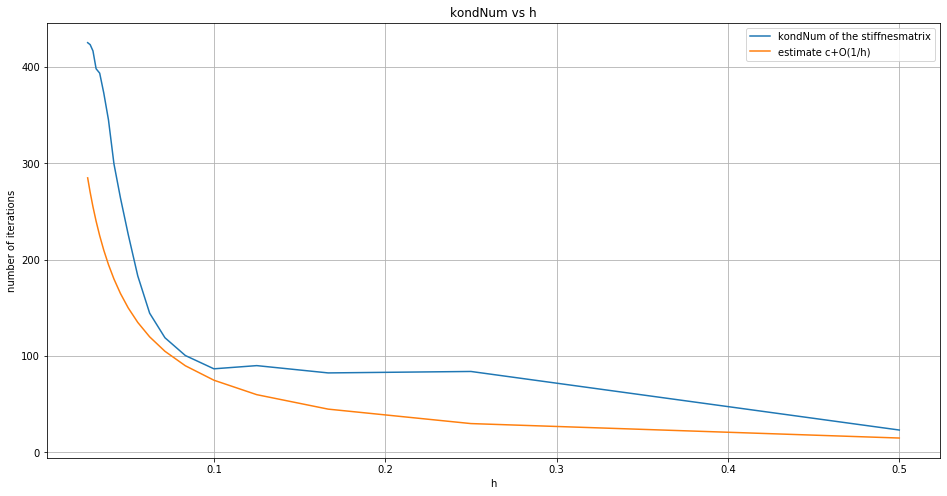

In [14]:

plt.figure(figsize=(16,8))
#plt.plot(d_a,num_a,label='kondNum of the massmatrix')
plt.plot(d_b,kond_b,label='kondNum of the stiffnesmatrix')
plt.plot(d_b,ref_b,label='estimate c+O(1/h)')

plt.title("kondNum vs h")
plt.grid()
plt.xlabel("h")
plt.ylabel("number of iterations")
plt.legend()
plt.savefig("atest.png")